In [3]:
from sklearn.datasets import load_wine
from sklearn import preprocessing
import numpy as np
from matplotlib import pyplot as plt 
samples, labels = load_wine(return_X_y=True)
N = 178

In [4]:
# Computation of the empirical mean of data, both as a vector and as a tiled matrix
mean_vec = samples.mean(axis = 1)
mean_mat = np.tile(mean_vec.reshape(samples.shape[0],1),[1,samples.shape[1]])

# Centered data matrix
centered_X = samples - mean_mat


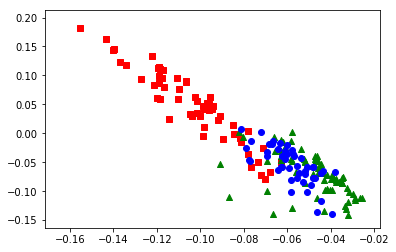

In [5]:
# Singular value decomposition of centered data
U, s, Vh = np.linalg.svd(centered_X)

# Matrix of the top two principal components of the centered data matrix
U_2 = U[:,0:2]

# Compute the PCA-based features of the centered data using the top-two principal components
# PCA Features
X_tilde = U_2.T

# Scatter plot for labels '0' and '1' and '2' using the two-dimensional PCA features
plt.scatter(X_tilde.T[np.where(labels==0),0],X_tilde.T[np.where(labels==0),1],c='r',marker='s')
plt.scatter(X_tilde.T[np.where(labels==1),0],X_tilde.T[np.where(labels==1),1],c='g',marker='^')
plt.scatter(X_tilde.T[np.where(labels==2),0],X_tilde.T[np.where(labels==2),1],c='b',marker='o')

plt.show()

In [6]:
# Computation of the empirical mean of data, both as a vector and as a tiled matrix
var_vec = centered_X.std(axis = 1)
var_mat = np.tile(var_vec.reshape(centered_X.shape[0],1),[1,centered_X.shape[1]])

standardized_X = centered_X/var_mat


(2L, 178L)


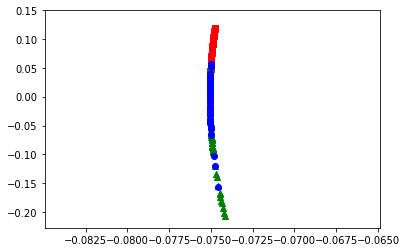

In [7]:
# Singular value decomposition of standardized data
U_stan, s_stan, Vh_stan = np.linalg.svd(standardized_X)

# Matrix of the top two principal components of the centered data matrix
U_stan_2 = U_stan[:,0:2]

# Compute the PCA-based features of the centered data using the top-two principal components
# PCA Features
X_stan_tilde = U_stan_2.T
print(X_stan_tilde.shape)

# Scatter plot for labels '0' and '1' and '2' using the two-dimensional PCA features
plt.scatter(X_stan_tilde.T[np.where(labels==0),0],X_stan_tilde.T[np.where(labels==0),1],c='r',marker='s')
plt.scatter(X_stan_tilde.T[np.where(labels==1),0],X_stan_tilde.T[np.where(labels==1),1],c='g',marker='^')
plt.scatter(X_stan_tilde.T[np.where(labels==2),0],X_stan_tilde.T[np.where(labels==2),1],c='b',marker='o')

plt.show()

## Naive Bayes Classsification

In [30]:
#print(X_stan_tilde.T)
#print(labels.shape)

In [43]:
# Calculate the gaussian probability density function:

def calculateProbability(x, mean, stdev):
    exponent = math.exp(-(math.pow(x-mean,2)/(2*math.pow(stdev,2))))
    return (1/(math.sqrt(2*math.pi)*stdev))*exponent



In [34]:
# Prior probability for labels 0,1 and 2
import collections
from __future__ import division
count_list = collections.Counter(labels) 
print(count_list)

# prior probability for label 0: no. of label 0 objects/ total number of objects
prior_0 = count_list[0]/178
print(prior_0)

prior_1 = count_list[1]/178
print(prior_1)

prior_2 = count_list[2]/178
print(prior_2)

Counter({1: 71, 0: 59, 2: 48})
0.331460674157
0.398876404494
0.269662921348


In [35]:
# Likelihood functions
# likelihood of X given label 0, likelihood of X given label 1, likelihood of X given label 2
# likelihood of X given label 0 = no. of label 0's in the vicinity of X / Total number of label 0's


In [36]:
# Posterior  = Prior x Likelihood

In [44]:

# we begin by calculating prior probabilities for the two classes:
from __future__ import division
import collections
def occurrences(labels):
    no_of_examples = len(labels)
    prob = collections.Counter(labels)
    for key in prob.keys():
        prob[key] = prob[key] / float(no_of_examples)
    return prob

print(occurrences(labels))

Counter({1: 0.398876404494382, 0: 0.33146067415730335, 2: 0.2696629213483146})


In [45]:
from __future__ import division
def naive_bayes(training, labels, new_sample):
    # get all labels
    classes     = np.unique(labels)
    # get the number of data smaples and the number of features
    rows, cols  = np.shape(training)
    likelihoods = {}
    for cls in classes:
        likelihoods[cls] = collections.defaultdict(list)
  
    # PRIOR PROBABILITY
    class_probabilities = occurrences(labels)
  
    for cls in classes:
        row_indices = np.where(labels == cls)[0]
        subset      = training[row_indices, :]
        r, c        = np.shape(subset)
        for j in range(0,c):
            likelihoods[cls][j] += list(subset[:,j])
  
    for cls in classes:
        for j in range(0,cols):
             likelihoods[cls][j] = occurrences(likelihoods[cls][j])
                
    #print(likelihoods)
    results = {}
    for cls in classes:
        class_probability = class_probabilities[cls]
        for i in range(0,len(new_sample)):
            relative_values = likelihoods[cls][i]
            if new_sample[i] in relative_values.keys():
                    class_probability = class_probability * relative_values[new_sample[i]]
            #else:
                 #class_probability = class_probability * 0
            results[cls] = class_probability
    #print results
    return(results)


training = X_stan_tilde.T
new_sample = np.asarray([ -0.07495661 -0.07357057])
print(naive_bayes(training, labels, new_sample))

{0: 0.33146067415730335, 1: 0.398876404494382, 2: 0.2696629213483146}


In [46]:
from random import randrange
 
# Split a dataset into k folds
def k_fold_cross_validation_split(dataset, folds=5):
    for i in range(folds):
    return dataset_split

In [52]:
# k fold on centered data only
# case 1
training2 = k_fold_cross_validation_split(X_tilde.T)

print("\n")

# case 2
# k fold on standardized data
print(k_fold_cross_validation_split(X_stan_tilde.T))




[[array([-0.07506955,  0.01323253]), array([-0.07491794, -0.085142  ]), array([-0.07485832,  0.10121977]), array([-0.07506028, -0.02403844]), array([-0.0749898 ,  0.06286997]), array([-0.07489228, -0.0914194 ]), array([-0.07494584, -0.07242182]), array([-0.07493387, -0.0810425 ]), array([-0.07503905,  0.04039911]), array([-0.07506065,  0.02013416]), array([-0.07506686,  0.01300665]), array([-0.07495305,  0.07580041]), array([-0.07506585,  0.01631187]), array([-0.07487154,  0.09808441]), array([-0.07506428, -0.02050516]), array([-0.07491382, -0.08650638]), array([-0.07488147, -0.09445186]), array([-0.0748983,  0.0913425]), array([-0.07493632,  0.08080855]), array([-0.07503656, -0.03425044]), array([-0.07500187, -0.05769434]), array([-0.07493163,  0.08192454]), array([-0.0750661 , -0.00771708]), array([-0.07483785,  0.1059126 ]), array([-0.07503895,  0.03960536]), array([-0.07507311,  0.00089085]), array([-0.07503579, -0.03805882]), array([-0.07503912,  0.03915661]), array([-0.07497194

In [78]:
new_sample = np.asarray([ -0.07495661 -0.07357057])
training_k = np.asarray(training2[0])

#print(naive_bayes(training_k, labels, new_sample))

In [74]:
print(type(X_stan_tilde.T[1]))

<type 'numpy.ndarray'>
